 Лабораторна робота 8

 У цій лабораторній роботі у другому завданні нам потрібно у відсортованому за алфавітом наборі даних визначити індивідуально за залежностями: i1=n-1,i2=n+29,i3=n+59 , де і1,і2,і3 - індекс класу (починаючи з 0 ) у моєму випадку це :

 I1=6-1=5

 I2=36+29=65

 I3=66+59=125-101=24

 і виходить що  мої класи за номером це:
 
beef_tartare , churros та miso_soup


Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


c:\Users\kingg\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\kingg\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2530 - loss: 10.6264

c:\Users\kingg\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 41s 3s/step - accuracy: 0.2558 - loss: 10.3340 - val_accuracy: 0.3840 - val_loss: 1.0956
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.3617 - loss: 1.1396 - val_accuracy: 0.3533 - val_loss: 1.0969
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.4047 - loss: 1.0974 - val_accuracy: 0.4413 - val_loss: 1.0943
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.4300 - loss: 1.0666 - val_accuracy: 0.3720 - val_loss: 1.0900
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5230 - loss: 1.0354 - val_accuracy: 0.5093 - val_loss: 1.0242
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5442 - loss: 1.0299 - val_accuracy: 0.4680 - val_loss: 1.0583
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.5068 - loss: 0.9922 - val_accuracy: 0.5253 - val_loss: 0.9987
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.4824 - loss: 0.9328 - val_accuracy: 0.5733 - val_loss: 0.9569
Ep

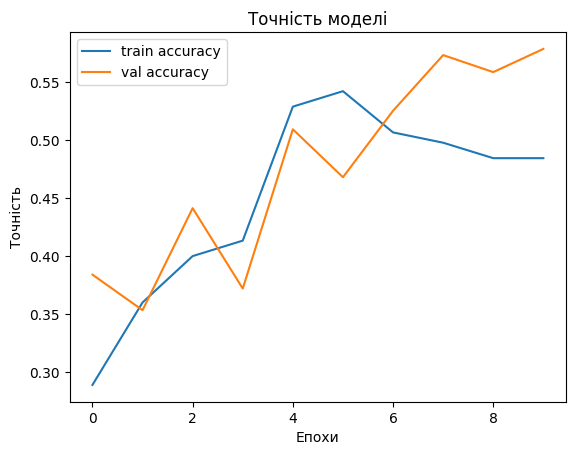

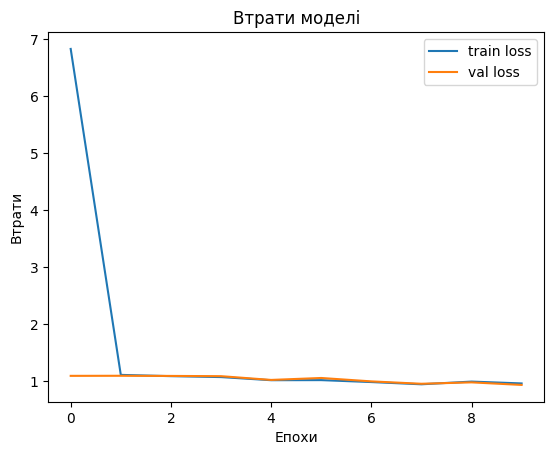

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 189ms/step - accuracy: 0.5719 - loss: 0.9453
Тестова точність: 57.87%


In [1]:
# Завантаження необхідних бібліотек
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Створення ImageDataGenerator для підготовки даних з аугментацією
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Завантаження тренувальних та тестових даних
train_data = train_datagen.flow_from_directory(
    '101_food_classes_10_percent/train',  # Папка з тренувальними зображеннями
    target_size=(256, 256),
    batch_size=20,
    class_mode='categorical'
)

test_data = test_datagen.flow_from_directory(
    '101_food_classes_10_percent/test',  # Папка з тестовими зображеннями
    target_size=(256, 256),
    batch_size=20,
    class_mode='categorical'
)

# Створення моделі CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Для класифікації на 3 класи
])

# Компіляція моделі
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Використання ранньої зупинки
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Тренування моделі
history = model.fit(
    train_data,
    epochs=10,
    validation_data=test_data,
    callbacks=[early_stopping]
)

# Візуалізація результатів

# Графік точності
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Точність моделі')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.legend()
plt.show()

# Графік втрат
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Втрати моделі')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.legend()
plt.show()

# Оцінка результатів на тестових даних
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Тестова точність: {test_accuracy * 100:.2f}%")
